In [153]:
#Importar pandas y cargar el dataset TravelInsurancePrediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df_travel_insurance = pd.read_csv("D:\\NO ELIMINAR\\Documents\\Maestria\\Tratamiento de Datos\\Clase 3\\TravelInsurancePrediction.csv")

In [154]:
#Visualizar las primeras 5 columnas
df_travel_insurance.head(5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [155]:
#Se renombra la columna Unnamed
df_travel_insurance.rename({'Unnamed: 0': 'Id_cliente'}, axis = 1, inplace = True)
df_travel_insurance.head(5)

,Id_cliente,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [156]:
#Visualizar de que esta compuesto el dataset
df_travel_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id_cliente           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [157]:
#Para el modelo predictivo se utilizará la edad de los viajeros
df_travel_insurance.describe()

,Id_cliente,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [158]:
#Se crea un backup para limpieza de los datos
df_travel_insurance_bk = df_travel_insurance.copy()
df_travel_insurance_bk.head(5)

,Id_cliente,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [159]:
#Buscamos si hay duplicados
duplicates = df_travel_insurance_bk.duplicated(keep = False)
df_travel_insurance_bk[duplicates]

,Id_cliente,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance


In [160]:
#Buscamos valores nulos
null_columns= df_travel_insurance_bk.columns[df_travel_insurance_bk.isnull().any()]
df_travel_insurance_bk[null_columns].isnull().sum()

Series([], dtype: float64)

In [161]:
#Modificamos el indice por el id del cliente 
df_travel_insurance_bk.set_index("Id_cliente", inplace = True)
#corr = df_travel_insurance_bk.corr()
#corr.style.background_gradient(cmap = 'coolware')

In [162]:
#Se crea la columna Ingresos anuales para categorizar al cliente segun sus ingresos: (1 Alto: mayor a 1250000, 2 Medio: entre 600000 y 1250000 , 3 Bajo: menor a 600000)
df_travel_insurance_bk["TipoIngresos"] = df_travel_insurance_bk["AnnualIncome"].apply(lambda x: 1 if x > 1250000 else (2 if x >= 600000 and x <= 1250000 else 3))
df_travel_insurance_bk["LabelTipoIngresos"] = df_travel_insurance_bk["AnnualIncome"].apply(lambda x: 'Alto' if x > 1250000 else ('Medio' if x >= 600000 and x <= 1250000 else 'Bajo'))
df_travel_insurance_bk.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,TipoIngresos,LabelTipoIngresos
Id_cliente,,,,,,,,,,,
0,31,Government Sector,Yes,400000,6,1,No,No,0,3,Bajo
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,2,Medio
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,3,Bajo
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,2,Medio
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,2,Medio


In [163]:
#Se crea la columna Integrantes de la familia para categorizar al cliente: (1 Grande: mas de 6 integrantes, 2 Mediana: entre 4 a 6 integrantes y 3 Pequeña: 1 a 3 integrantes) 
df_travel_insurance_bk["TipoFamila"] = df_travel_insurance_bk["FamilyMembers"].apply(lambda x: 1 if x > 6 else (2 if x >= 4 and x <= 6 else 3))
df_travel_insurance_bk["LabelTipoFamila"] = df_travel_insurance_bk["FamilyMembers"].apply(lambda x: 'Grande' if x > 6 else ('Mediana' if x >= 4 and x <= 6 else 'Pequeña'))
df_travel_insurance_bk.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,TipoIngresos,LabelTipoIngresos,TipoFamila,LabelTipoFamila
Id_cliente,,,,,,,,,,,,,
0,31,Government Sector,Yes,400000,6,1,No,No,0,3,Bajo,2,Mediana
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,2,Medio,1,Grande
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,3,Bajo,2,Mediana
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,2,Medio,3,Pequeña
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,2,Medio,1,Grande


In [164]:
#Se crea la columna CompraSeguro para determinar si el cliente compro o no el seguro: (0: no, 1: si)
df_travel_insurance_bk["CompraSeguro"] = df_travel_insurance_bk["TravelInsurance"].apply(lambda x: "Compra" if x == 1 else "No Compra")
df_travel_insurance_bk.head(5)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,TipoIngresos,LabelTipoIngresos,TipoFamila,LabelTipoFamila,CompraSeguro
Id_cliente,,,,,,,,,,,,,,
0,31,Government Sector,Yes,400000,6,1,No,No,0,3,Bajo,2,Mediana,No Compra
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,2,Medio,1,Grande,No Compra
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,3,Bajo,2,Mediana,Compra
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,2,Medio,3,Pequeña,No Compra
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,2,Medio,1,Grande,No Compra


class:  ndarray
shape:  (1987,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x293d1076190
byteorder:  little
byteswap:  False
type: object


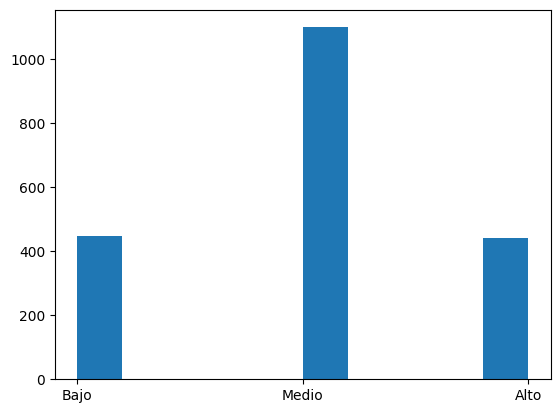

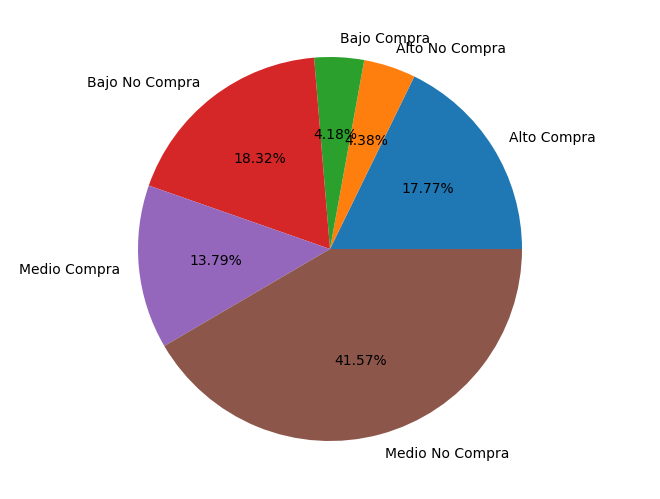

In [165]:
#Se genera un histograma inicial con la nueva columna LabelTipoIngresos y un grafico de pastel con los datos de las personas que adquirieron el seguro por el tipo de ingresos 
histogramaIngresos = np.array(df_travel_insurance_bk["LabelTipoIngresos"])
np.info(histogramaIngresos)
plt.hist(histogramaIngresos)
plt.show() 

fig = plt.figure()
ax = fig.add_axes([0, 0, 1 , 1])
ax.axis('equal')
dfTipoIngresos= df_travel_insurance_bk.copy().iloc[:, [0, 10, 13]]
contadorTipoIngresos = dfTipoIngresos.groupby(['LabelTipoIngresos', 'CompraSeguro']).size().reset_index(name = 'TotalValores')
labels = contadorTipoIngresos['LabelTipoIngresos'].str.cat(contadorTipoIngresos['CompraSeguro'], sep=' ')
arrayTipoIngreso = contadorTipoIngresos['TotalValores']
ax.pie(arrayTipoIngreso, labels = labels, autopct='%1.2f%%')
plt.show()

CONCLUSIONES
Del análisis de los datos se puede concluir que:
1. Las personas con mayores ingresos (>1250000) son los que mas compraron el nuevo seguro de viajes con el 17.77%
2. El mayor porcentaje de personas que no compraron el seguro esta en el rango de ingresos medio (entre 600000 y 1250000) con el 41.57
3. Se debe mejorar la campaña para atraer a las personas de ingresos medios, ya que el porcentaje de personas que no compraron representa el porcentaje mas alto del total de clientes.

class:  ndarray
shape:  (1987,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x293d103a0a0
byteorder:  little
byteswap:  False
type: object


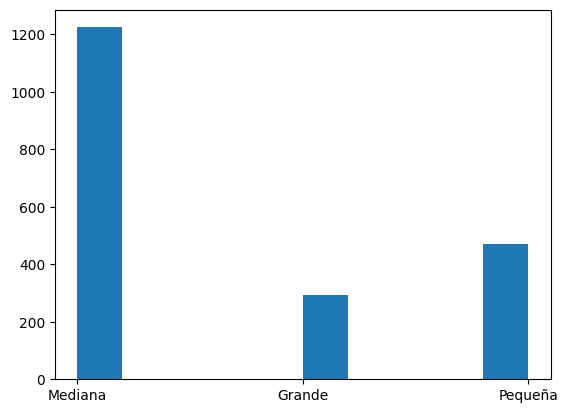

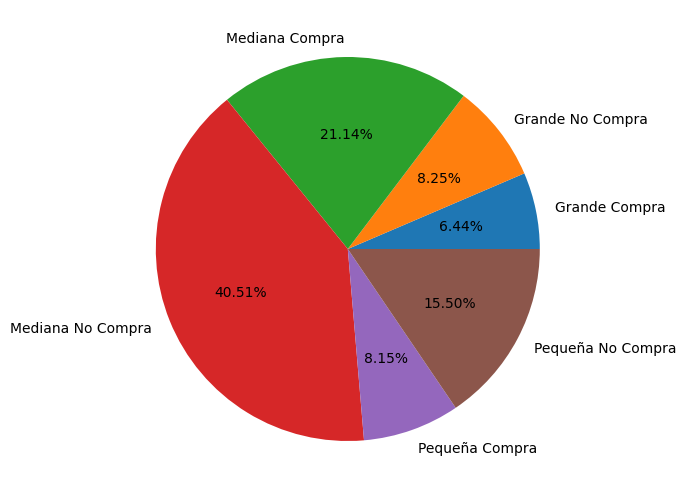

In [166]:
#Se genera un histograma con la nueva columna LabelTipoFamila y un grafico de pastel con los datos de las personas que adquirieron el seguro por el tipo de familia a la que pertenecen 
histogramaIngresos = np.array(df_travel_insurance_bk["LabelTipoFamila"])
np.info(histogramaIngresos)
plt.hist(histogramaIngresos)
plt.show() 

fig = plt.figure()
ax = fig.add_axes([0, 0, 1 , 1])
ax.axis('equal')
dfTipoIngresos= df_travel_insurance_bk.copy().iloc[:, [0, 12, 13]]
contadorTipoIngresos = dfTipoIngresos.groupby(['LabelTipoFamila', 'CompraSeguro']).size().reset_index(name = 'TotalValores')
labels = contadorTipoIngresos['LabelTipoFamila'].str.cat(contadorTipoIngresos['CompraSeguro'], sep=' ')
arrayTipoIngreso = contadorTipoIngresos['TotalValores']
ax.pie(arrayTipoIngreso, labels = labels, autopct='%1.2f%%')
plt.show()

CONCLUSIONES
Del análisis de los datos se puede concluir que:
(1 Grande: mas de 6 integrantes, 2 Mediana: entre 4 a 6 integrantes y 3 Pequeña: 1 a 3 integrantes) 
1. Las personas que pertenecen a una familia mediana (entre 4 a 6 integrantes) son los que mas compraron el nuevo seguro de viajes con el 21.14%
2. El mayor porcentaje de personas que no compraron el seguro esta en el rango de familia mediana (entre 4 a 6 integrantes) con el 40.51
3. Se debe mejorar la campaña para atraer a las personas de con familias perqueñas y grandes ya que el porcentaje en estos rangos es muy pequeño.

In [167]:
#Se define las variables X, Y.
#X serasAge, ChronicDiseases, TipoIngresos y TipoFamilia.
#Y sera TravelInsurance
X= df_travel_insurance_bk.copy().iloc[:, [0, 5, 9, 11]]
#df_travel_insurance_bk.head(5)
#X.head()
y= df_travel_insurance_bk["CompraSeguro"]
#y.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              1987 non-null   int64
 1   ChronicDiseases  1987 non-null   int64
 2   TipoIngresos     1987 non-null   int64
 3   TipoFamila       1987 non-null   int64
dtypes: int64(4)
memory usage: 77.6 KB


In [168]:
#nos cercioramos que los datos de nuestro DataFrame son númericos
X = X.astype(float)

In [169]:
y.head()

Id_cliente
0    No Compra
1    No Compra
2       Compra
3    No Compra
4    No Compra
Name: CompraSeguro, dtype: object

In [170]:
#Se crea el árbol de decisión
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

In [171]:
X_test

,Age,ChronicDiseases,TipoIngresos,TipoFamila
Id_cliente,,,,
145,28,0,2,2
1614,34,0,1,2
14,31,0,3,3
9,33,0,2,3
773,31,0,2,2
...,...,...,...,...
1544,29,0,2,1
240,27,0,3,1
541,29,0,2,2


In [172]:
#Se Ejecuta la predicción
predictions = clf.predict(X_test)
predictions

array(['No Compra', 'Compra', 'No Compra', 'No Compra', 'No Compra',
       'No Compra', 'No Compra', 'No Compra', 'No Compra', 'No Compra',
       'No Compra', 'Compra', 'No Compra', 'Compra', 'No Compra',
       'No Compra', 'Compra', 'No Compra', 'No Compra', 'Compra',
       'No Compra', 'Compra', 'No Compra', 'No Compra', 'No Compra',
       'Compra', 'No Compra', 'No Compra', 'No Compra', 'No Compra',
       'No Compra', 'No Compra', 'No Compra', 'No Compra', 'Compra',
       'Compra', 'Compra', 'Compra', 'No Compra', 'Compra', 'No Compra',
       'Compra', 'No Compra', 'No Compra', 'No Compra', 'No Compra',
       'Compra', 'No Compra', 'Compra', 'No Compra', 'No Compra',
       'No Compra', 'Compra', 'No Compra', 'No Compra', 'No Compra',
       'No Compra', 'No Compra', 'No Compra', 'No Compra', 'No Compra',
       'No Compra', 'No Compra', 'No Compra', 'No Compra', 'Compra',
       'No Compra', 'No Compra', 'No Compra', 'No Compra', 'No Compra',
       'No Compra', 'No Compra

In [173]:
#Se importa métricas importantes para interpretarlas
#accuray score nos permite conocer el valor porcentual de aciertos totales en este caso 95%

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7759146341463414

In [174]:
#la matriz de confusión nos enseña cuantas veces una clase fue asiganada correctamente en este caso 501 veces Good fue asignado correctamente
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions,labels = ("Compra", "No Compra"))

array([[134, 112],
       [ 35, 375]], dtype=int64)

In [175]:
#precision score es el porcentaje de correctos positivos por cada clase, en este caso 96% de precision para Good
from sklearn.metrics import precision_score
precision_score(y_test, predictions, pos_label = "Compra")

0.7928994082840237

In [176]:
#precision score para vinos Bad es solo 42% esto porque no hay demasiados vinos con calificación menor a 5 en el dataset
from sklearn.metrics import precision_score
precision_score(y_test, predictions, pos_label = "No Compra")

0.7700205338809035

In [177]:
features_names = X.columns
features_names

Index(['Age', 'ChronicDiseases', 'TipoIngresos', 'TipoFamila'], dtype='object')

In [178]:
#obtenemos aquellas variables que son más importantes en nuestro arbol de decisión 
clf.feature_importances_

array([0.16561787, 0.00977248, 0.68399197, 0.14061767])

In [179]:
features_dt = pd.DataFrame(clf.feature_importances_, index = features_names)
features_dt

,0
Age,0.165618
ChronicDiseases,0.009772
TipoIngresos,0.683992
TipoFamila,0.140618


<AxesSubplot: >

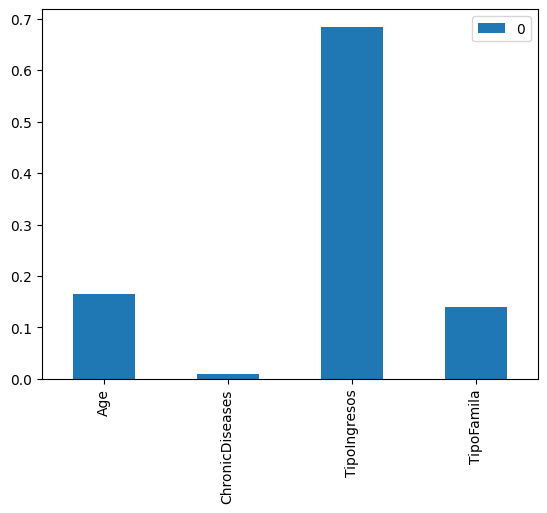

In [180]:
features_dt.plot(kind="bar")

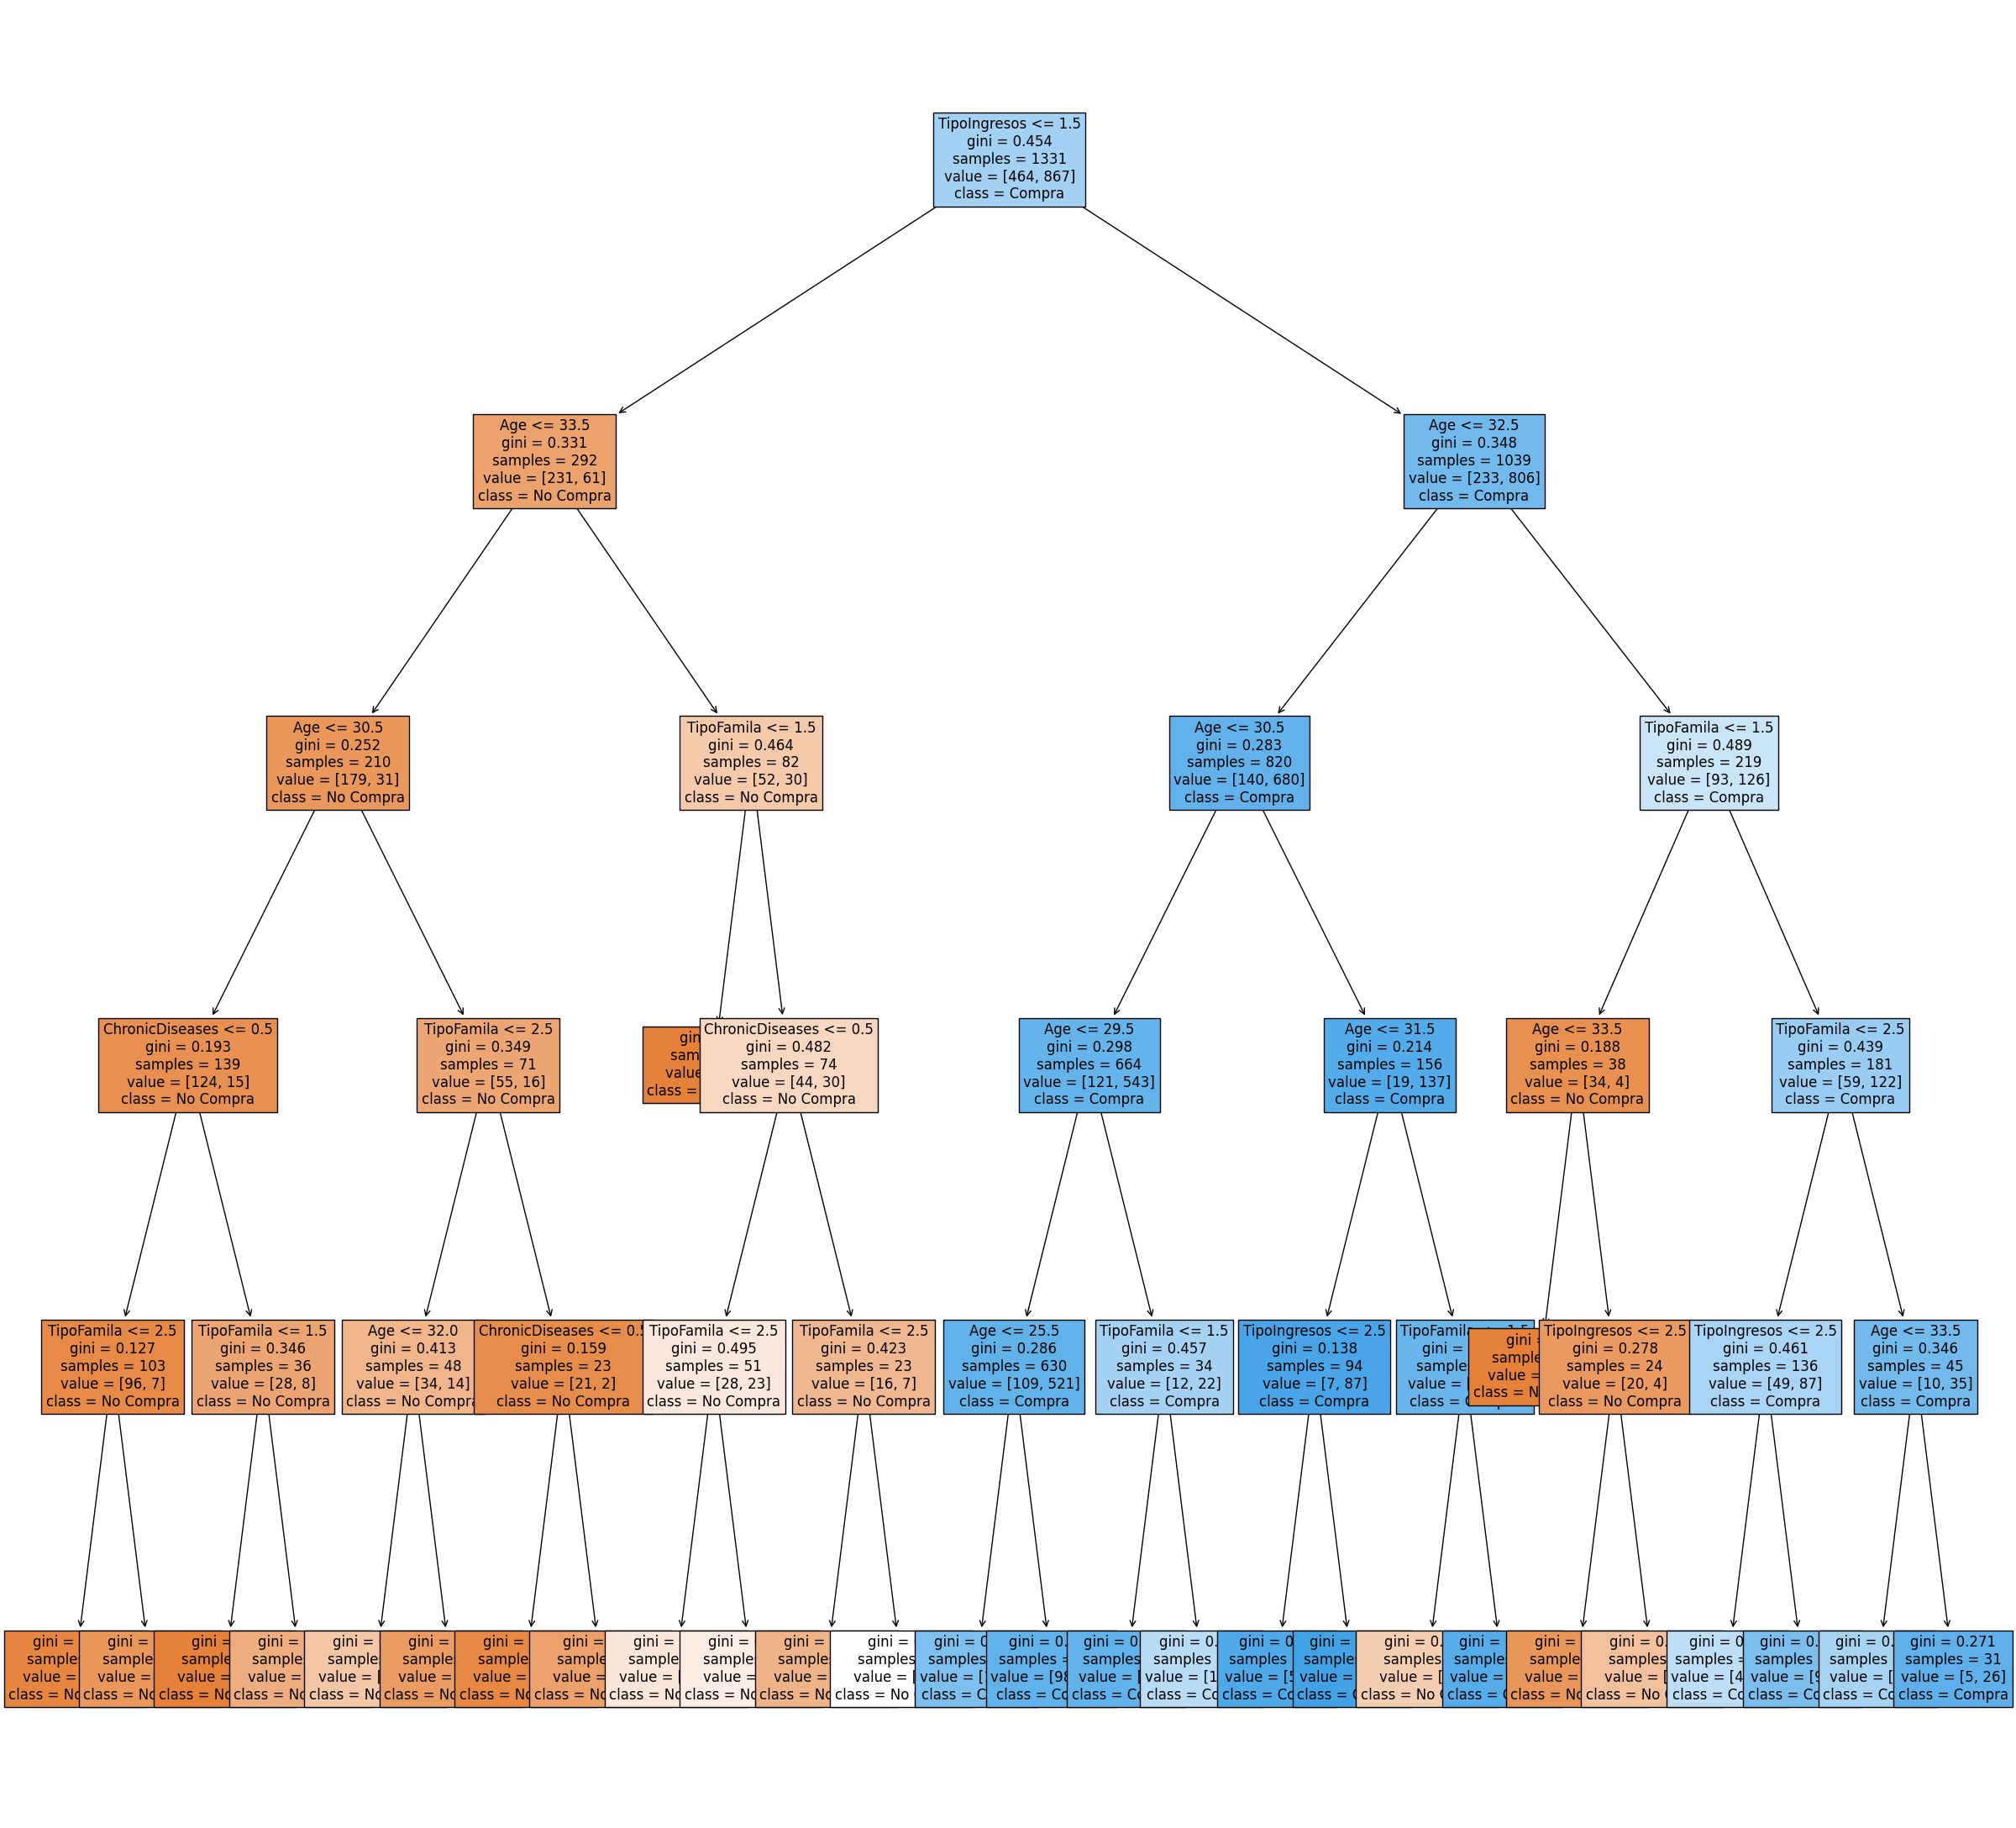

In [181]:
#Graficamos nuestro arbol de decision con una profundidad de 5 
#podemos concluir que una mayor acidez y una menor acidez volatil son caracteristicas imporantes para un buen vino
from sklearn import tree 
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(30,28)) 
_ = tree.plot_tree(clf,
               feature_names = features_names,
               class_names = {0:"No Compra",1:"Compra"},
               filled = True,
               fontsize = 12)